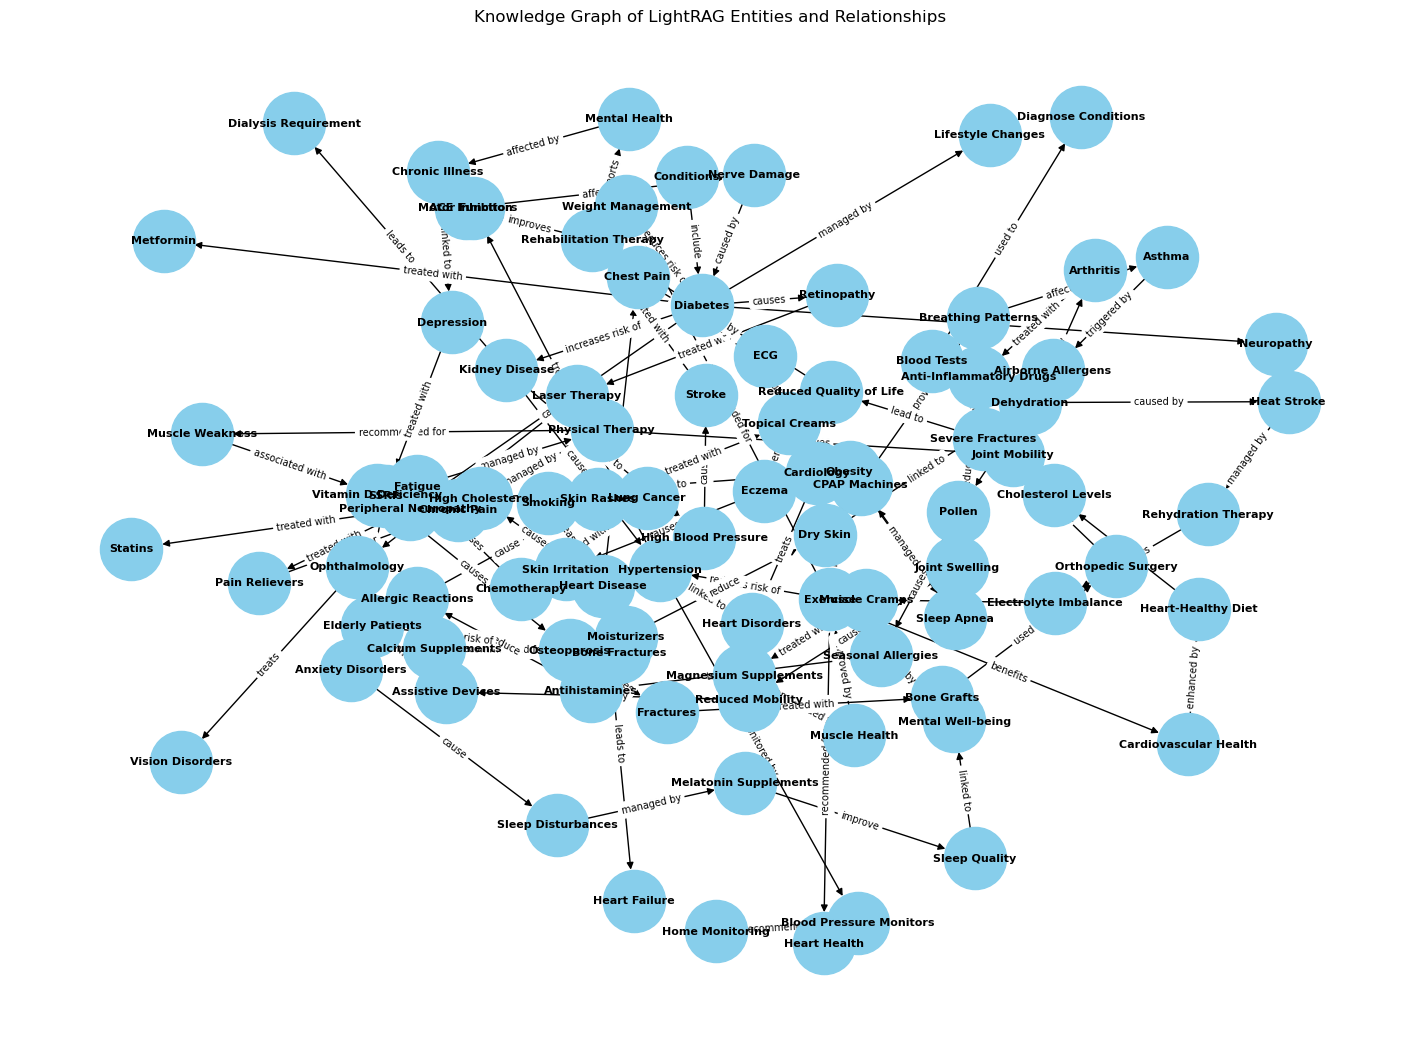

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import spacy

triplets = [
    ("Diabetes", "causes", "Neuropathy"),
    ("Diabetes", "increases risk of", "Kidney Disease"),
    ("Diabetes", "treated with", "Metformin"),
    ("Diabetes", "managed by", "Lifestyle Changes"),
    ("Kidney Disease", "leads to", "Dialysis Requirement"),
    ("Kidney Disease", "caused by", "Hypertension"),
    ("Hypertension", "increases risk of", "Heart Disease"),
    ("Hypertension", "treated with", "ACE Inhibitors"),
    ("Heart Disease", "leads to", "Heart Failure"),
    ("Heart Disease", "caused by", "High Cholesterol"),
    ("High Cholesterol", "treated with", "Statins"),
    ("High Cholesterol", "linked to", "Obesity"),
    ("Obesity", "causes", "Diabetes"),
    ("Obesity", "managed by", "Exercise"),
    ("Exercise", "reduces risk of", "Hypertension"),
    ("Exercise", "recommended for", "Heart Health"),
    ("Smoking", "causes", "Lung Cancer"),
    ("Smoking", "increases risk of", "Heart Disease"),
    ("Lung Cancer", "treated with", "Chemotherapy"),
    ("Chemotherapy", "causes", "Fatigue"),
    ("Fatigue", "managed by", "Physical Therapy"),
    ("Physical Therapy", "recommended for", "Muscle Weakness"),
    ("Muscle Weakness", "associated with", "Vitamin D Deficiency"),
    ("Vitamin D Deficiency", "causes", "Osteoporosis"),
    ("Osteoporosis", "leads to", "Bone Fractures"),
    ("Bone Fractures", "treated with", "Calcium Supplements"),
    ("Calcium Supplements", "recommended for", "Osteoporosis"),
    ("Diabetes", "causes", "Retinopathy"),
    ("Retinopathy", "treated with", "Laser Therapy"),
    ("Laser Therapy", "used in", "Ophthalmology"),
    ("Ophthalmology", "treats", "Vision Disorders"),
    ("Kidney Disease", "linked to", "High Blood Pressure"),
    ("High Blood Pressure", "causes", "Stroke"),
    ("Stroke", "treated with", "Rehabilitation Therapy"),
    ("Rehabilitation Therapy", "improves", "Motor Function"),
    ("Motor Function", "affected by", "Nerve Damage"),
    ("Nerve Damage", "caused by", "Diabetes"),
    ("Heart Disease", "causes", "Chest Pain"),
    ("Chest Pain", "diagnosed by", "ECG"),
    ("ECG", "used in", "Cardiology"),
    ("Cardiology", "treats", "Heart Disorders"),
    ("Heart Disorders", "linked to", "Hypertension"),
    ("Hypertension", "monitored by", "Blood Pressure Monitors"),
    ("Blood Pressure Monitors", "recommended for", "Home Monitoring"),
    ("Obesity", "linked to", "Sleep Apnea"),
    ("Sleep Apnea", "managed by", "CPAP Machines"),
    ("CPAP Machines", "improve", "Breathing Patterns"),
    ("Breathing Patterns", "affected by", "Asthma"),
    ("Asthma", "triggered by", "Airborne Allergens"),
    ("Airborne Allergens", "include", "Pollen"),
    ("Pollen", "causes", "Seasonal Allergies"),
    ("Seasonal Allergies", "treated with", "Antihistamines"),
    ("Antihistamines", "reduce", "Allergic Reactions"),
    ("Allergic Reactions", "cause", "Skin Rashes"),
    ("Skin Rashes", "treated with", "Topical Creams"),
    ("Topical Creams", "recommended for", "Eczema"),
    ("Eczema", "causes", "Skin Irritation"),
    ("Skin Irritation", "managed by", "Moisturizers"),
    ("Moisturizers", "reduce", "Dry Skin"),
    ("Dry Skin", "linked to", "Dehydration"),
    ("Dehydration", "caused by", "Heat Stroke"),
    ("Heat Stroke", "managed by", "Rehydration Therapy"),
    ("Rehydration Therapy", "prevents", "Electrolyte Imbalance"),
    ("Electrolyte Imbalance", "causes", "Muscle Cramps"),
    ("Muscle Cramps", "treated with", "Magnesium Supplements"),
    ("Magnesium Supplements", "recommended for", "Muscle Health"),
    ("Muscle Health", "improved by", "Exercise"),
    ("Exercise", "recommended for", "Weight Management"),
    ("Weight Management", "reduces risk of", "Diabetes"),
    ("Diabetes", "causes", "Peripheral Neuropathy"),
    ("Peripheral Neuropathy", "treated with", "Pain Relievers"),
    ("Pain Relievers", "used for", "Chronic Pain"),
    ("Chronic Pain", "managed by", "Physical Therapy"),
    ("Physical Therapy", "improves", "Joint Mobility"),
    ("Joint Mobility", "reduced by", "Arthritis"),
    ("Arthritis", "treated with", "Anti-Inflammatory Drugs"),
    ("Anti-Inflammatory Drugs", "reduce", "Joint Swelling"),
    ("Joint Swelling", "causes", "Reduced Mobility"),
    ("Reduced Mobility", "managed by", "Assistive Devices"),
    ("Assistive Devices", "recommended for", "Elderly Patients"),
    ("Elderly Patients", "at risk of", "Osteoporosis"),
    ("Osteoporosis", "causes", "Fractures"),
    ("Fractures", "treated with", "Bone Grafts"),
    ("Bone Grafts", "used in", "Orthopedic Surgery"),
    ("Orthopedic Surgery", "required for", "Severe Fractures"),
    ("Severe Fractures", "lead to", "Reduced Quality of Life"),
    ("Reduced Quality of Life", "improved by", "Rehabilitation Therapy"),
    ("Rehabilitation Therapy", "supports", "Mental Health"),
    ("Mental Health", "affected by", "Chronic Illness"),
    ("Chronic Illness", "linked to", "Depression"),
    ("Depression", "treated with", "SSRIs"),
    ("SSRIs", "used for", "Anxiety Disorders"),
    ("Anxiety Disorders", "cause", "Sleep Disturbances"),
    ("Sleep Disturbances", "managed by", "Melatonin Supplements"),
    ("Melatonin Supplements", "improve", "Sleep Quality"),
    ("Sleep Quality", "linked to", "Mental Well-being"),
    ("Mental Well-being", "improved by", "Exercise"),
    ("Exercise", "benefits", "Cardiovascular Health"),
    ("Cardiovascular Health", "enhanced by", "Heart-Healthy Diet"),
    ("Heart-Healthy Diet", "reduces", "Cholesterol Levels"),
    ("Cholesterol Levels", "monitored by", "Blood Tests"),
    ("Blood Tests", "used to", "Diagnose Conditions"),
    ("Conditions", "include", "Diabetes"),
]

G = nx.DiGraph()

for source, relationship, target in triplets:
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, label=relationship)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.3, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=8, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.5)
plt.title("Knowledge Graph of LightRAG Entities and Relationships")
plt.show()

# Expansion using biogpt

In [11]:
import networkx as nx

def expand_query(graph, query, depth): 
    if query not in graph:
        print(f"{query} not found in the knowledge graph.")
        return set()
    
    expansion = {query}
    
    for neighbor in nx.single_source_shortest_path_length(graph, query, cutoff=depth):
        if neighbor != query:
            expansion.add(neighbor)
    
    return expansion

query = "How does smoking affect a person?"
expanded_terms = expand_query(G, query, depth=2)
print(f"Expanded terms for '{query}': {expanded_terms}")

How does smoking affect a person? not found in the knowledge graph.
Expanded terms for 'How does smoking affect a person?': set()


In [10]:
import re
from transformers import pipeline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer, util

def extract_known_entities(query, graph):
    return [node for node in graph.nodes if re.search(rf'\b{node}\b', query, re.IGNORECASE)]

def compute_relevance_score(graph, entity):
    relevance_scores = {}
    for neighbor in graph.neighbors(entity):
        edge_data = graph.get_edge_data(entity, neighbor)
        edge_weight = edge_data.get("weight", 1)
        relevance_scores[neighbor] = edge_weight
    return relevance_scores

def expand_query_with_graph(graph, entities, synonym_model, max_hops=2):
    expanded_terms = {}
    for entity in entities:
        if entity in graph:
            related_terms = {}
            for neighbor, path_length in nx.single_source_shortest_path_length(graph, entity, cutoff=max_hops).items():
                if neighbor != entity:
                    relevance_scores = compute_relevance_score(graph, neighbor)
                    total_score = sum(relevance_scores.values()) / (path_length + 1)
                    related_terms[neighbor] = total_score

            synonyms = synonym_model.encode([entity] + list(related_terms.keys()), convert_to_tensor=True)
            similarity_scores = util.cos_sim(synonyms[0], synonyms[1:]).squeeze()
            synonym_terms = {list(related_terms.keys())[i]: similarity_scores[i].item() for i in range(len(similarity_scores))}

            related_terms.update(synonym_terms)

            scaler = MinMaxScaler()
            scores = np.array(list(related_terms.values())).reshape(-1, 1)
            normalized_scores = scaler.fit_transform(scores).flatten()

            expanded_terms[entity] = {
                term: normalized_scores[i] for i, term in enumerate(related_terms.keys())
            }
        else:
            expanded_terms[entity] = {}
    return expanded_terms

def filter_redundancy_and_clustering(expanded_terms, sentence_model):
    clustered_terms = {}
    for entity, terms in expanded_terms.items():
        sentences = [f"{entity} is related to {term}" for term in terms.keys()]
        embeddings = sentence_model.encode(sentences, convert_to_tensor=True)
        clustered = util.community_detection(embeddings, min_community_size=1)
        clusters = {entity: [sentences[idx] for idx in cluster] for cluster in clustered}
        clustered_terms[entity] = clusters
    return clustered_terms

# Generate prompts for LLM integration
def generate_llm_prompt(query, clustered_terms):
    context_sentences = []
    for entity, clusters in clustered_terms.items():
        for cluster_sentences in clusters.values():
            context_sentences.extend(cluster_sentences)
    context = " ".join(context_sentences)
    input_text = f"{context} Based on this, how does {query.split()[2]} affect a person?"
    return input_text

# Initialize the Hugging Face pipeline
text_generator = pipeline("text2text-generation", model="microsoft/biogpt")
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Query example
query = "How does smoking affect a person?"
entities = ["Smoking", "Lung Cancer", "Heart Disease"]

expanded_entities = expand_query_with_graph(G, entities, sentence_model, max_hops=2)
print("Expanded entities and terms:")
for entity, terms in expanded_entities.items():
    print(f"{entity} - {terms}")

# Filter redundancy and perform clustering
clustered_terms = filter_redundancy_and_clustering(expanded_entities, sentence_model)

# Generate and use refined query
input_prompt = generate_llm_prompt(query, clustered_terms)
response = text_generator(query, max_length=150, do_sample=True, top_k=50)

# Extract and clean the refined query
refined_query = response[0]["generated_text"].strip()
print(f"Original Query: {query}")
print(f"Refined Query: {refined_query}")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
The model 'BioGptForCausalLM' is not supported for text2text-generation. Supported models are ['BartForConditionalGeneration', 'BigBirdPegasusForConditionalGeneration', 'BlenderbotForConditionalGeneration', 'BlenderbotSmallForConditionalGeneration', 'EncoderDecoderModel', 'FSMTForConditionalGeneration', 'GPTSanJapaneseForConditionalGeneration', 'LEDForConditionalGeneration', 'LongT5ForConditionalGeneration', 'M2M100ForConditionalGeneration', 'MarianMTModel', 'MBartForConditionalGeneration', 'MT5ForConditionalGeneration', 'MvpForConditionalGeneration', 'NllbMoeForConditionalGeneration', 'PegasusForConditionalGeneration', 'PegasusXForConditionalGeneration', 'PLBartForConditionalGeneration', 'ProphetNetForConditionalGeneration', 'Qwen2AudioForConditionalGeneration', 'SeamlessM4TForTextToText', 'SeamlessM4Tv2ForTextToText', 'SwitchTransformersFor

Expanded entities and terms:
Smoking - {'Lung Cancer': 0.9999999999999998, 'Heart Disease': 0.4309104321358408, 'Chemotherapy': 0.46505247894748725, 'Heart Failure': 0.29200920172293987, 'High Cholesterol': 0.0, 'Chest Pain': 0.5499661398460667}
Lung Cancer - {'Chemotherapy': 1.0, 'Fatigue': 0.0}
Heart Disease - {'Heart Failure': 1.0, 'High Cholesterol': 0.3341091904122292, 'Chest Pain': 0.6347773536570207, 'Statins': 0.0, 'Obesity': 0.179638190851933, 'ECG': 0.10381175980553115}


model.safetensors:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

Original Query: How does smoking affect a person?
Refined Query: How does smoking affect a person?


In [36]:
import re
import numpy as np
from transformers import pipeline
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer, util
import networkx as nx

# Initialize Hugging Face pipeline and sentence transformer model
def initialize_models():
    text_generator = pipeline("text2text-generation", model="google/flan-t5-small")
    sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
    return text_generator, sentence_model

text_generator, sentence_model = initialize_models()


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [37]:
def extract_known_entities(query, graph):
    """Extract entities from the query using graph nodes."""
    return [node for node in graph.nodes if re.search(rf'\b{node}\b', query, re.IGNORECASE)]


In [38]:
def compute_relevance_score(graph, entity):
    """Assign relevance scores to relationships based on edge weights."""
    relevance_scores = {}
    for neighbor in graph.neighbors(entity):
        edge_data = graph.get_edge_data(entity, neighbor)
        edge_weight = edge_data.get("weight", 1)
        relevance_scores[neighbor] = edge_weight
    return relevance_scores


In [39]:
def expand_query_with_graph(graph, entities, synonym_model, max_hops=2):
    """
    Expand query terms using graph traversal, relevance scoring, and synonym similarity.
    """
    expanded_terms = {}
    for entity in entities:
        if entity in graph:
            related_terms = {}
            # Graph traversal
            for neighbor, path_length in nx.single_source_shortest_path_length(graph, entity, cutoff=max_hops).items():
                if neighbor != entity:
                    relevance_scores = compute_relevance_score(graph, neighbor)
                    total_score = sum(relevance_scores.values()) / (path_length + 1)  # Normalize by path length
                    related_terms[neighbor] = total_score

            # Synonym expansion
            synonyms = synonym_model.encode([entity] + list(related_terms.keys()), convert_to_tensor=True)
            similarity_scores = util.cos_sim(synonyms[0], synonyms[1:]).squeeze()
            synonym_terms = {list(related_terms.keys())[i]: similarity_scores[i].item() for i in range(len(similarity_scores))}

            # Combine and normalize scores
            related_terms.update(synonym_terms)
            scaler = MinMaxScaler()
            scores = np.array(list(related_terms.values())).reshape(-1, 1)
            normalized_scores = scaler.fit_transform(scores).flatten()
            expanded_terms[entity] = {term: normalized_scores[i] for i, term in enumerate(related_terms.keys())}
        else:
            expanded_terms[entity] = {}
    return expanded_terms


In [40]:
def filter_redundancy_and_clustering(expanded_terms, sentence_model):
    """
    Filter redundant terms and perform clustering using sentence embeddings.
    """
    clustered_terms = {}
    for entity, terms in expanded_terms.items():
        sentences = [f"{entity} is related to {term}" for term in terms.keys()]
        embeddings = sentence_model.encode(sentences, convert_to_tensor=True)
        clustered = util.community_detection(embeddings, min_community_size=1)
        clusters = {entity: [sentences[idx] for idx in cluster] for cluster in clustered}
        clustered_terms[entity] = clusters
    return clustered_terms


In [41]:
def generate_llm_prompt(query, clustered_terms):
    """
    Combine the input query and clustered terms into a single, coherent context for LLM input.

    Parameters:
    - query (str): The original query, which can be any medical-related text.
    - clustered_terms (dict): A dictionary of entities with their corresponding clustered terms.

    Returns:
    - str: A combined input text suitable for LLM processing.
    """
    # Collect sentences from clustered terms
    context_sentences = []
    for entity, clusters in clustered_terms.items():
        for cluster_sentences in clusters.values():
            context_sentences.extend(cluster_sentences)
    
    # Combine query and context
    context = " ".join(context_sentences)
    combined_input = f"Query: {query}\nContext: {context}"
    
    return combined_input


In [42]:
query = "How does smoking affect a person?"
entities = extract_known_entities(query, G)

# Step 1: Expand Query
expanded_entities = expand_query_with_graph(G, entities, sentence_model, max_hops=2)
print("### Expanded entities and terms:")
for entity, terms in expanded_entities.items():
    print(f"{entity} - {terms}")
    

# Step 2: Filter Redundancy and Perform Clustering
clustered_terms = filter_redundancy_and_clustering(expanded_entities, sentence_model)
print(f"\n ### Clustered: {clustered_terms}")

# Step 3: Generate Refined Query Using LLM
input_prompt = generate_llm_prompt(query, clustered_terms)
response = text_generator(input_prompt, max_length=150, do_sample=True, top_k=50)

# Step 4: Output Final Results
refined_query = response[0]["generated_text"].strip()
print(f"Original Query: {query}")
print(f"Refined Query: {refined_query}")


### Expanded entities and terms:
Smoking - {'Lung Cancer': 0.9999999999999998, 'Heart Disease': 0.4309104321358408, 'Chemotherapy': 0.46505247894748725, 'Heart Failure': 0.29200920172293987, 'High Cholesterol': 0.0, 'Chest Pain': 0.5499661398460667}

 ### Clustered: {'Smoking': {'Smoking': ['Smoking is related to Chemotherapy']}}
Original Query: How does smoking affect a person?
Refined Query: Chemotherapy


In [58]:
# Step 1: Extract Known Entities
query = "How does smoking affect a person?"
entities = extract_known_entities(query, G)

# Step 2: Expand Query Using Knowledge Graph
expanded_entities = expand_query_with_graph(G, entities, sentence_model, max_hops=2)
print("### Expanded entities and terms:")
for entity, terms in expanded_entities.items():
    print(f"{entity} - {terms}")

# Step 3: Generate LLM Prompt Using Query and Expanded Entities
def generate_llm_prompt_simple(query, expanded_entities):
    """
    Combine the input query and expanded entities into a single, instructional prompt for the LLM.

    Parameters:
    - query (str): The original query.
    - expanded_entities (dict): Expanded entities and their related terms.

    Returns:
    - str: Combined input text for the LLM with explicit instructions.
    """
    # Combine expanded entities into readable text
    entity_context = []
    for entity, terms in expanded_entities.items():
        term_list = ", ".join(terms.keys())
        entity_context.append(f"- {entity}: {term_list}")
    
    # Add instructions to the LLM
    context = "\n".join(entity_context)
    combined_prompt = (
        f"Given the following query and related medical terms:\n\n"
        f"Query: {query}\n\n"
        f"Related Medical Terms:\n{context}\n\n"
        f"provide an expanded version of the query using the Related medical terms. Also add the query at the end."
    )
    return combined_prompt


# Step 3: Generate LLM Prompt Using Query and Expanded Entities
input_prompt = generate_llm_prompt_simple(query, expanded_entities)
print("\n### Input Prompt for LLM:")
print(input_prompt)

# Step 4: Generate Response Using LLM
response = text_generator(input_prompt, max_length=150, do_sample=True, top_k=50)

# Step 5: Output Final Results
refined_query = response[0]["generated_text"].strip()
print("\n### Final Results:")
print(f"Original Query: {query}")
print(f"Refined Query: {refined_query}")

### Expanded entities and terms:
Smoking - {'Lung Cancer': 0.9999999999999998, 'Heart Disease': 0.4309104321358408, 'Chemotherapy': 0.46505247894748725, 'Heart Failure': 0.29200920172293987, 'High Cholesterol': 0.0, 'Chest Pain': 0.5499661398460667}

### Input Prompt for LLM:
Given the following query and related medical terms:

Query: How does smoking affect a person?

Related Medical Terms:
- Smoking: Lung Cancer, Heart Disease, Chemotherapy, Heart Failure, High Cholesterol, Chest Pain

provide an expanded version of the query using the Related medical terms. Also add the query at the end.

### Final Results:
Original Query: How does smoking affect a person?
Refined Query: How does smoking affect a person.


# Expansion using biobart-large

In [8]:
!pip install transformers networkx scikit-learn sentence-transformers

# Expansion using pubmedbert

# Expansion using GROC